In [1]:
# Start
import os
import time
print("last time run: {}".format(time.strftime("%c")))
CWD = os.getcwd()
print("Current working dir: {}".format(CWD))


last time run: Thu Apr  4 14:36:08 2019
Current working dir: /home/bren/Home/projects/Food-Desert/census/data


In [2]:
# Style
from IPython.core.display  import HTML
from IPython.core.debugger import set_trace

def css_styling():
    styles = open("/home/bren/Home/python/Jupyter/Jupyter Notebooks/custom.css", "r").read()
    return HTML(styles)
css_styling()


In [3]:
# setup TOC
import sys
toc_path = '/home/bren/miniconda3/lib/python3.7/site-packages/IPythonTOC-1.2.0-py3.7.egg'
if toc_path not in sys.path:
    sys.path.append(toc_path)
else:
    print('toc_path in sys.path already')

from IPythonTOC import IPythonTOC
toc = IPythonTOC()

toc_path in sys.path already


In [4]:
# imports
from matplotlib import pyplot as plt, rcParams
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")
rcParams["figure.figsize"] = (14, 7)

import IPython, platform
%reload_ext watermark
print("Python  {}".format(platform.python_version()))
%watermark -v -m -p IPython,matplotlib,numpy,pandas,seaborn


Python  3.7.3
CPython 3.7.3
IPython 7.1.1

IPython 7.1.1
matplotlib 3.0.2
numpy 1.16.1
pandas 0.23.4
seaborn 0.9.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.9.0-8-amd64
machine    : x86_64
processor  : 
CPU cores  : 8
interpreter: 64bit


<a id='Table_of_Contents'></a> 
### Table of Contents

[Load Data](#Load_Data)

[Explore Data](#Explore_Data)

* [Non-Zero Categoricals](#Non_Zero_Categoricals)
* [Non-Zero Numeric Variables](#Non_Zero_Numeric_Variables)
* [Zero-Valued Numeric Variables](#Zero_Valued_Numeric_Variables)
* [Scaled Numeric Variables](#Scaled_Numeric_Variables)
* [Correlations In Numeric Variables](#Correlations_In_Numeric_Variables)
* [Violin Plot of Numeric Variables](#Violin_Plot_of_Numeric_Variables)


## Load Data
<a id='Load_Data'></a>


[Table of Contents](#Table_of_Contents)

In [5]:
# load data
if os.path.isfile('Food_Access_Research_Atlas_Data_TN.csv'):
    fara_tn_df = pd.read_csv('Food_Access_Research_Atlas_Data_TN.csv')
else:
    fara_df = pd.read_csv('Food_Access_Research_Atlas_Data.csv')
    fara_tn_df = fara_df[fara_df.State == 'TN']
    fara_tn_df.to_csv('Food_Access_Research_Atlas_Data_TN.csv', index=False)    
    try:
        del fara_df
    except:
        pass


In [6]:
# results of loading file
print('loaded Food_Access_Research_Atlas_Data_TN')
print('{:,d} rows for Tennessee'.format(len(fara_tn_df)))
print('First 5 rows')
fara_tn_df.head()


loaded Food_Access_Research_Atlas_Data_TN
1,497 rows for Tennessee
First 5 rows


,CensusTract,State,County,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,LA1and10,...,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lahunv20,lahunv20share
0,47001020100,TN,Anderson,0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47001020201,TN,Anderson,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47001020202,TN,Anderson,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47001020300,TN,Anderson,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47001020400,TN,Anderson,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Explore Data
<a id='Explore_Data'></a>


[Table of Contents](#Table_of_Contents)

In [29]:
fara_variables = pd.read_csv('Food_Access_Research_Atlas_Data_Variables.csv')
fara_variables.set_index('Field', inplace=True)
fara_variables.head()

,LongName
Field,
CensusTract,Census tract
County,County
GroupQuartersFlag,"Group quarters, tract with high share"
HUNVFlag,"Vehicle access, tract with low vehicle access"
LA1and10,Low access tract at 1 mile for urban areas or ...


## Non-Zero Categoricals
<a id='Non_Zero_Categoricals'></a>


[Table of Contents](#Table_of_Contents)

In [7]:
# capture numerics and describe them
def get_numerics_and_objects(data):
    data_objects = set([c for c, v in  data.dtypes.items() if v == np.dtype('O')])
    data_numerics = set([c for c, v in  data.dtypes.items() if c not in data_objects])
    return data_numerics, data_objects


In [8]:
def print_categorical_uniques(df):
    vars_numeric, vars_categorical = get_numerics_and_objects(df)
    for k in vars_categorical:
        uvals = df[k].unique()
        print()
        print('{} has these unique values:'.format(k))
        for uv in uvals:
            print('\t{}'.format(uv))


In [9]:
# printing unique values of categorical variables
print_categorical_uniques(fara_tn_df)


County has these unique values:
	Anderson
	Bedford
	Benton
	Bledsoe
	Blount
	Bradley
	Campbell
	Cannon
	Carroll
	Carter
	Cheatham
	Chester
	Claiborne
	Clay
	Cocke
	Coffee
	Crockett
	Cumberland
	Davidson
	Decatur
	DeKalb
	Dickson
	Dyer
	Fayette
	Fentress
	Franklin
	Gibson
	Giles
	Grainger
	Greene
	Grundy
	Hamblen
	Hamilton
	Hancock
	Hardeman
	Hardin
	Hawkins
	Haywood
	Henderson
	Henry
	Hickman
	Houston
	Humphreys
	Jackson
	Jefferson
	Johnson
	Knox
	Lake
	Lauderdale
	Lawrence
	Lewis
	Lincoln
	Loudon
	McMinn
	McNairy
	Macon
	Madison
	Marion
	Marshall
	Maury
	Meigs
	Monroe
	Montgomery
	Moore
	Morgan
	Obion
	Overton
	Perry
	Pickett
	Polk
	Putnam
	Rhea
	Roane
	Robertson
	Rutherford
	Scott
	Sequatchie
	Sevier
	Shelby
	Smith
	Stewart
	Sullivan
	Sumner
	Tipton
	Trousdale
	Unicoi
	Union
	Van Buren
	Warren
	Washington
	Wayne
	Weakley
	White
	Williamson
	Wilson

UATYP10 has these unique values:
	U
	R
	C

State has these unique values:
	TN


## Non-Zero Numeric Variables
<a id='Non_Zero_Numeric_Variables'></a>


[Table of Contents](#Table_of_Contents)

In [10]:
def print_describe(df, stride):
    vars_numeric = []
    vars_numeric_zero = []

    i = df.ftypes
    for k in i.keys():
        if 'integer' in i[k] or 'float' in i[k]:
            if 0 != sum(df[k] != 0):
                vars_numeric.append(k)
            else:
                vars_numeric_zero.append(k)

    desc_df = df[vars_numeric]
    for start in range(0, len(vars_numeric), stride):
        end = start + stride
        if end > len(vars_numeric):
            end = -1
        print(desc_df[vars_numeric[start:end]].describe(), '\n')
    print(len(vars_numeric), len(vars_numeric_zero))
    return vars_numeric, vars_numeric_zero


In [36]:
# list count, mean, std, min, max, and 25% quadrants of numeric variables
vars_numeric, vars_numeric_zero = print_describe(fara_tn_df, 4)


          NUMGQTRS     PCTGQTRS     lapophalf  lapophalfshare
count  1489.000000  1489.000000   1497.000000     1497.000000
mean    103.070517     0.028088   3588.657508        0.840268
std     361.660158     0.104319   1842.693608        0.213020
min       0.000000     0.000000      0.000000        0.000000
25%       0.000000     0.000000   2320.000009        0.754020
50%       0.000000     0.000000   3389.759020        0.927829
75%      67.000000     0.015398   4660.999977        1.000000
max    4523.000000     1.000000  19249.815950        1.000000 

        lalowihalf  lalowihalfshare   lakidshalf  lakidshalfshare
count  1497.000000      1497.000000  1497.000000      1497.000000
mean   1280.212179         0.313335   852.467144         0.838284
std     778.323123         0.169526   525.485366         0.221121
min       0.000000         0.000000     0.000000         0.000000
25%     700.190736         0.188647   497.000002         0.754959
50%    1173.632852         0.306331   774.00

## Zero-Valued Numeric Variables
<a id='Zero_Valued_Numeric_Variables'></a>


[Table of Contents](#Table_of_Contents)

In [54]:
# variables with all values not equal to zero (to be kept)
print('These variables are not all zeros:\n')
pd.set_option('display.max_colwidth', 200)
fara_variables.loc[vars_numeric]


These variables are not all zeros:



,LongName
Field,
NUMGQTRS,"Group quarters, tract population residing in, number"
PCTGQTRS,"Group quarters, tract population residing in, share"
lapophalf,"Low access, people at 1/2 mile, number"
lapophalfshare,"Low access, people at 1/2 mile, share"
lalowihalf,"Low access, low-income people at 1/2 mile, number"
lalowihalfshare,"Low access, low-income people at 1/2 mile, share"
lakidshalf,"Low access, children age 0-17 at 1/2 mile, number"
lakidshalfshare,"Low access, children age 0-17 at 1/2 mile, share"
laseniorshalf,"Low access, seniors age 65+ at 1/2 mile, number"


In [40]:
# variables with all values equal to zero (to be dropped)
print('These variables are all zeros:\n')
fara_variables.loc[vars_numeric_zero]


These variables are all zeros:



,LongName
Field,
lapop20,"Low access, people at 20 miles, number"
lapop20share,"Low access, people at 20 miles, share"
lalowi20,"Low access, low-income people at 20 miles, number"
lalowi20share,"Low access, low-income people at 20 miles, share"
lakids20,"Low access, children age 0-17 at 20 miles, number"
lakids20share,"Low access, children age 0-17 at 20 miles, share"
laseniors20,"Low access, seniors age 65+ at 20 miles, number"
laseniors20share,"Low access, seniors age 65+ at 20 miles, share"
lahunv20,"Vehicle access, housing units without and low ..."


## Scaled Numeric Variables
<a id='Scaled_Numeric_Variables'></a>


[Table of Contents](#Table_of_Contents)

In [16]:
from sklearn.preprocessing import RobustScaler
vars_scaled_df = pd.DataFrame(RobustScaler(
                                  quantile_range=(25, 75)).fit_transform(fara_tn_df[list(vars_numeric)]),
                              columns=list(vars_numeric))


In [21]:
# scaled numeric variabiles (count, mean, std, min, max, 25% quadrants)
print("after scaling non-zero variables")
vars_numeric, vars_numeric_zero = print_describe(vars_scaled_df, 5)


after scaling non-zero variables
          NUMGQTRS     PCTGQTRS    lapophalf  lapophalfshare   lalowihalf
count  1489.000000  1489.000000  1497.000000     1497.000000  1497.000000
mean      1.538366     1.824113     0.084963       -0.355968     0.099666
std       5.397913     6.774726     0.787140        0.866007     0.727839
min       0.000000     0.000000    -1.447996       -3.771974    -1.097508
25%       0.000000     0.000000    -0.456967       -0.706597    -0.442733
50%       0.000000     0.000000     0.000000        0.000000     0.000000
75%       1.000000     1.000000     0.543033        0.293403     0.557267
max      67.507463    64.942234     6.774907        0.293404     3.860264 

       lalowihalfshare   lakidshalf  lakidshalfshare  laseniorshalf  \
count      1497.000000  1497.000000      1497.000000    1497.000000   
mean          0.029882     0.128846        -0.370417       0.073332   
std           0.723298     0.862866         0.902385       0.810851   
min          -1

## Correlations In Numeric Variables
<a id='Correlations_In_Numeric_Variables'></a>


[Table of Contents](#Table_of_Contents)

In [22]:
# look for correlations

vars_corr = vars_scaled_df.corr('pearson')

limit = 0.5
corr_count = 0
for name in vars_corr.columns:
    d = vars_corr[name][vars_corr.columns != name].describe()
    if d['mean'] > limit:
        corr_count += 1
if corr_count > 0:
    print('{:,d} found'.format(corr_count))
else:
    print('NO CORRELATIONS ABOVE {:.2%} FOUND!!!'.format(limit))
    

NO CORRELATIONS ABOVE 50.00% FOUND!!!


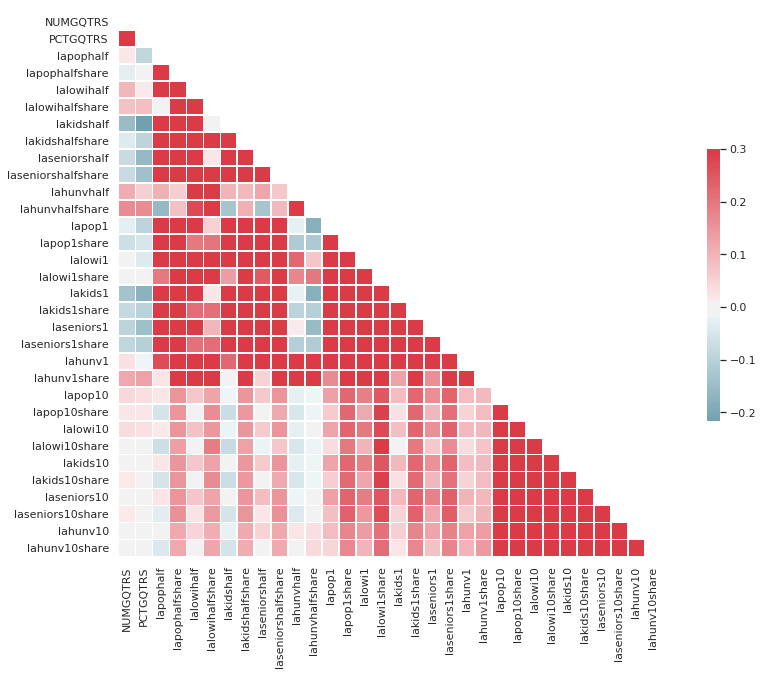

In [23]:
# correlation heatmap
import seaborn as sns

sns.set(style="white")

# Generate a large random dataset
d = vars_scaled_df

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           ax=ax);


## Violin Plot of Numeric Variables
<a id='Violin_Plot_of_Numeric_Variables'></a>


[Table of Contents](#Table_of_Contents)

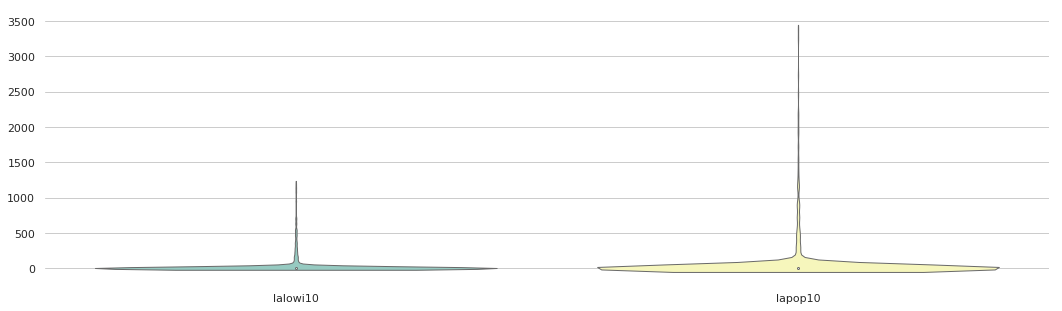

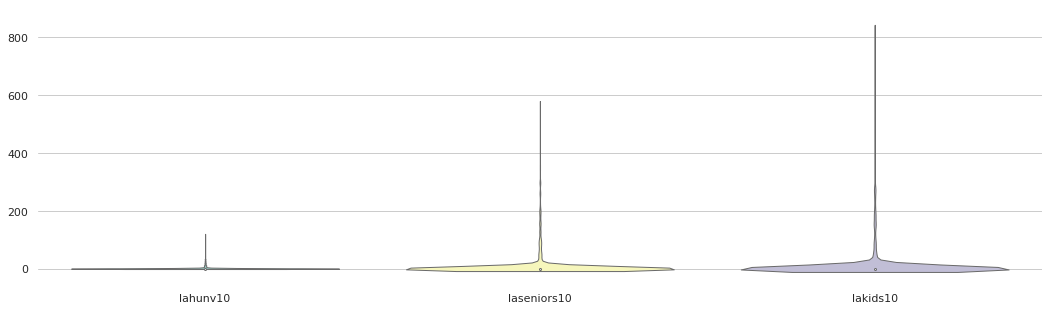

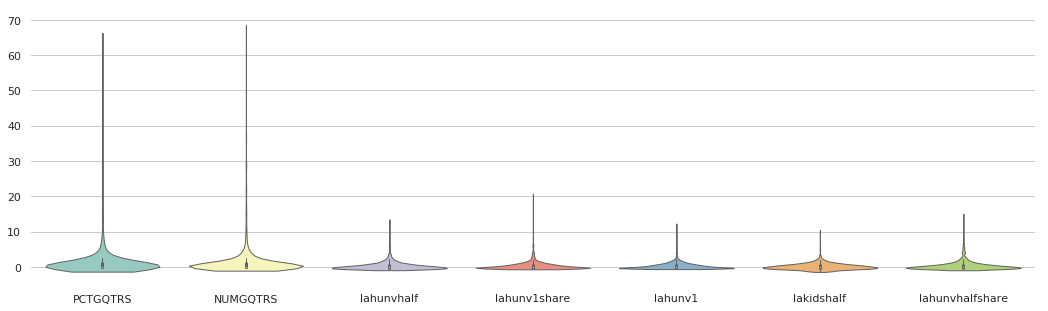

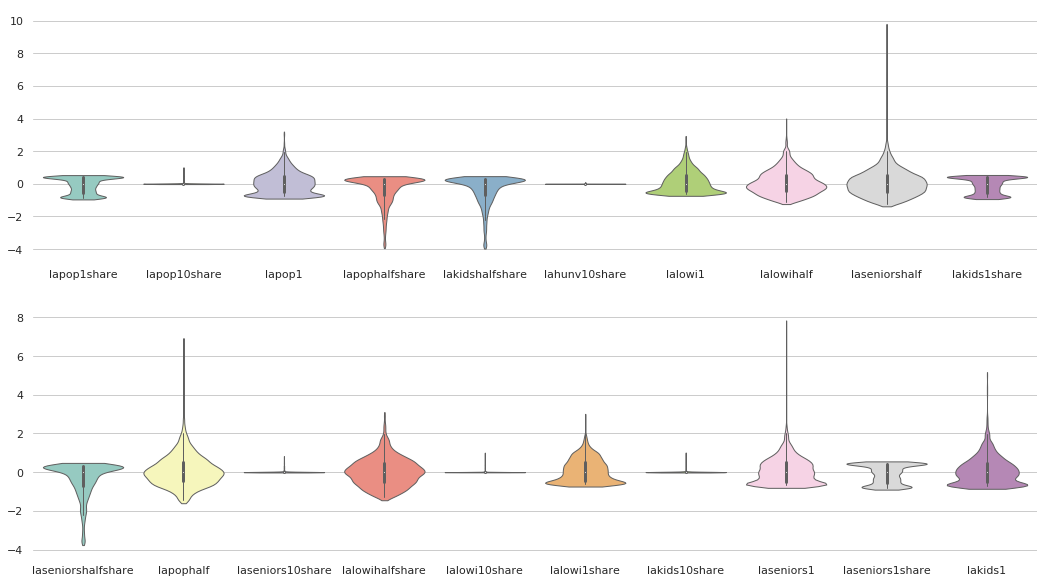

In [45]:
# violin plot of all variables scaled
sns.set(style="whitegrid")
stride = 10

import seaborn as sns

sns.set(style="whitegrid")

def plot_violins(df, vars_names, stride):

    # Set up the matplotlib figure
    num_vars = len(vars_names)
    num_plots = num_vars // stride
    if  num_vars % stride:
        num_plots += 1
    f, ax = plt.subplots(num_plots, 1, figsize=(18, 5 * num_plots))

    # Draw a violinplot with a narrower bandwidth than the default
    for ax_indx, start in enumerate(range(0, num_vars, stride)):
        end = start + stride
        if end >= num_vars:
            df_plot = df[vars_names[start:]]
        else:
            df_plot = df[vars_names[start:end]]
        if num_plots > 1:
            ax_plot = ax[ax_indx]
        else:
            ax_plot = ax
        sns.violinplot(ax=ax_plot, data=df_plot, palette="Set3",
                       bw=.2, cut=1, linewidth=1, scale='count')
        
    # Finalize the figure
    #ax.set(ylim=(-.7, 1.05))
    sns.despine(left=True, bottom=True)

from collections import defaultdict
vars_to_plot = defaultdict(list)
vars_so_far = set()

for scale in (1000., 100., 10., 0.):
    new_cols = set([col for col in vars_scaled_df.columns[vars_scaled_df.max() > scale] if col not in vars_so_far])
    vars_to_plot[scale] = new_cols
    vars_so_far = vars_so_far.union(new_cols)

    plot_violins(vars_scaled_df, list(new_cols), stride)

